## Notebook Imports

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import pydotplus
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import folium
import webbrowser
from folium import plugins
from imblearn.over_sampling import SMOTE


In [105]:
#Importing Dataset

main_df = pd.read_csv('Data-Collisions.csv') 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [106]:
#Converting Severity Code from (1/2) tp (0/1)
severity_code = main_df['SEVERITYCODE'].values
severity_code

array([2, 1, 1, ..., 2, 2, 1])

In [107]:
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

main_df ["SEVERITYCODE"] = severity_code
severity_code

array([1, 0, 0, ..., 1, 1, 0])

In [108]:
#Descriptive Stats
descriptive_stats= main_df.describe(include="all")
descriptive_stats

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,191996,84811,5638,194673.000000,194673,189769,194673.000000,194673.000000,194673.000000,194673.000000,194673,194673,188344,194673.000000,194673,29805,189789,189592,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,24102,2,1,NaN,2,10,NaN,NaN,NaN,NaN,5985,162058,7,NaN,39,1,4,11,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",NaN,Property Damage Only Collision,Parked Car,NaN,NaN,NaN,NaN,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (not related to intersection),NaN,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Clear,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,276,79173,5638,NaN,136485,47987,NaN,NaN,NaN,NaN,96,96,89800,NaN,85209,29805,100274,111135,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,0.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,NaN,NaN,NaN,1.298901,NaN,NaN,2.444427,0.037139,0.028391,1.920780,NaN,NaN,NaN,13.867768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,NaN,NaN,NaN,0.457778,NaN,NaN,1.345929,0.198150,0.167413,0.631047,NaN,NaN,NaN,6.868755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,0.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,0.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,0.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,1.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,NaN,NaN,NaN,2.000000,NaN,NaN,3.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [109]:
#Plotting counts of selected variables
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


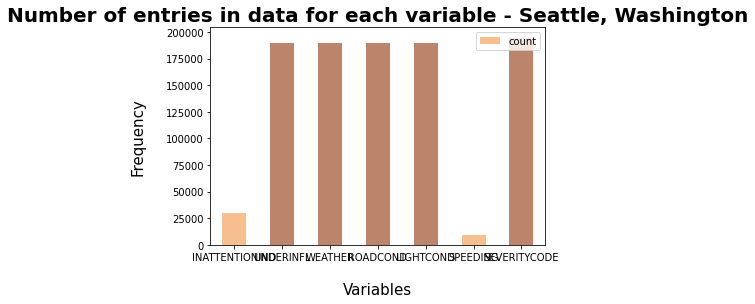

In [110]:
color_yo=['sandybrown','sienna','sienna','sienna','sienna','sandybrown','sienna']

descriptive_stats_plot.plot(kind='bar',alpha=0.70,color=[color_yo])
plt.title('Number of entries in data for each variable - Seattle, Washington', fontsize=20, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=360)
plt.show()

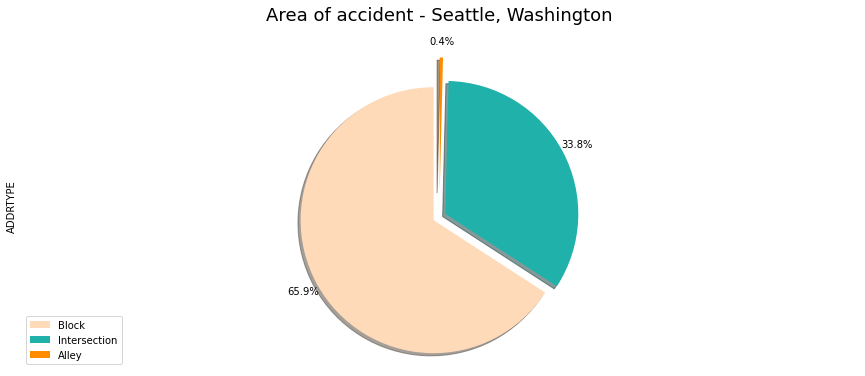

In [111]:
#Area type of each accident

explode_list = [0.05, 0.05, 0.2]
color_list=['peachpuff','lightseagreen','darkorange']
addtype=main_df['ADDRTYPE'].value_counts()

addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)


plt.title('Area of accident - Seattle, Washington', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()


In [112]:
#Check IncKey unqiue numbers
main_df['INCKEY'].nunique()

194673

In [113]:
#Encoding in attention (0 = No, 1 = Yes)

main_df["INATTENTIONIND"].replace("Y", 1, inplace=True)
main_df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

In [114]:
#Encoding Under the influence (0 = No, 1 = Yes)

main_df["UNDERINFL"].replace("N", 0, inplace=True)
main_df["UNDERINFL"].replace("Y", 1, inplace=True)


In [115]:
#Encoding Speeding(0 = No, 1 = Yes)

main_df["SPEEDING"].replace("Y", 1, inplace=True)
main_df["SPEEDING"].replace(np.nan, 0, inplace=True)

In [116]:
#Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)

main_df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
main_df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
main_df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
main_df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
main_df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
main_df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
main_df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
main_df["LIGHTCOND"].replace("Other","Unknown", inplace=True)

In [117]:
#Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow

main_df["WEATHER"].replace("Clear", 0, inplace=True)
main_df["WEATHER"].replace("Raining", 3, inplace=True)
main_df["WEATHER"].replace("Overcast", 1, inplace=True)
main_df["WEATHER"].replace("Other", "Unknown", inplace=True)
main_df["WEATHER"].replace("Snowing", 3, inplace=True)
main_df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
main_df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
main_df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
main_df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
main_df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

In [118]:
#Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)

main_df["ROADCOND"].replace("Dry", 0, inplace=True)
main_df["ROADCOND"].replace("Wet", 2, inplace=True)
main_df["ROADCOND"].replace("Ice", 2, inplace=True)
main_df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
main_df["ROADCOND"].replace("Other", "Unknown", inplace=True)
main_df["ROADCOND"].replace("Standing Water", 2, inplace=True)
main_df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
main_df["ROADCOND"].replace("Oil", 2, inplace=True)

In [119]:
#Making new dataframe with only variables and unique keys

selected_columns=main_df[["X","Y","INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]

feature_df=selected_columns.copy()
feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()
feature_stats

,X,Y,INCKEY,INATTENTIONIND,SPEEDING,SEVERITYCODE
count,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000
mean,-122.330502,47.619544,138384.461586,0.158003,0.047278,0.304142
std,0.030018,0.056215,85503.159003,0.364745,0.212233,0.460045
min,-122.419091,47.495573,1001.000000,0.000000,0.000000,0.000000
25%,-122.348846,47.575884,68873.500000,0.000000,0.000000,0.000000
50%,-122.330168,47.615361,120488.000000,0.000000,0.000000,0.000000
75%,-122.311922,47.663835,199259.000000,0.000000,0.000000,1.000000
max,-122.238949,47.734142,331342.000000,1.000000,1.000000,1.000000


In [120]:
np.count_nonzero(feature_df['UNDERINFL'])

86923

In [121]:
#Light Condition

lightcondsize = feature_df ["LIGHTCOND"].size

featureinlightcond = feature_df ['LIGHTCOND'] == 'Unknown'

lightcond = feature_df['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[featureinlightcond]
lightcond

array(['Unknown', 'Unknown', 'Unknown', ..., 'Unknown', 'Unknown',
       'Unknown'], dtype=object)

In [122]:
lightcond[0:9036]=0
lightcond[9036:13417]=1
lightcond[13417:13961]=2

feature_df.loc[feature_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] =  lightcond

feature_df["LIGHTCOND"]=feature_df["LIGHTCOND"].astype(int)


In [123]:
#Road Condition
roadcondsize = feature_df ["ROADCOND"].size

featureinroadcond = feature_df ['ROADCOND'] == 'Unknown'

roadcond = feature_df['LIGHTCOND']
roadcond = roadcond.values
roadcond = roadcond[featureinroadcond]

roadcond[0:9954]=0
roadcond[9954:10040]=1
roadcond[10040:15163]=2

feature_df.loc[feature_df.ROADCOND == "Unknown", 'ROADCOND'] = roadcond
feature_df["ROADCOND"]=feature_df["ROADCOND"].astype(int)

In [124]:
#Weather Condition
weathersize = feature_df ["WEATHER"].size

featureinweather = feature_df ['WEATHER'] == 'Unknown'

weather = feature_df['WEATHER']
weather = weather.values
weather = weather[featureinweather]

weather[0:10151]=0
weather[10151:12683]=1
weather[12683:12742]=2
weather[12742:15864]=3

feature_df.loc[feature_df.WEATHER == "Unknown", 'WEATHER'] = weather
feature_df["WEATHER"]=feature_df["WEATHER"].astype(int)

In [125]:
#Converting remaining to int

feature_df["SPEEDING"]=feature_df["SPEEDING"].astype(int)
feature_df["INATTENTIONIND"]=feature_df["INATTENTIONIND"].astype(int)
feature_df["UNDERINFL"]=feature_df["UNDERINFL"].astype(int)

In [126]:
#ML Feature Sets

X = feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y = feature_df[["SEVERITYCODE"]].values

In [127]:
#Test/Train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (128916, 6) (128916, 1)
Test set: (55251, 6) (55251, 1)


In [128]:
# Balance the Data

os = SMOTE (random_state=0)
os_data_X, os_data_y= os.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [129]:
#Decision Tree Clasifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DT.fit(os_data_X,os_data_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [130]:
#Make Prediction:
yhatDT = DT.predict(X_test)

In [131]:
#Check Accuracy
print('Accuracy score for Decision Tree = ', accuracy_score(yhatDT, y_test))

Accuracy score for Decision Tree =  0.5760076740692476


In [132]:

print('Confusion Matrix - Decision Tree')
print(pd.crosstab(y_test.ravel(), yhatDT.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

print(classification_report(yhatDT,y_test))

Confusion Matrix - Decision Tree
Predicted      0      1    All
True                          
0          24461  13984  38445
1           9442   7364  16806
All        33903  21348  55251
              precision    recall  f1-score   support

           0       0.64      0.72      0.68     33903
           1       0.44      0.34      0.39     21348

    accuracy                           0.58     55251
   macro avg       0.54      0.53      0.53     55251
weighted avg       0.56      0.58      0.56     55251



In [133]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [134]:
#Plot it
cnf_matrix = confusion_matrix(y_test, yhatDT, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 7364  9442]
 [13984 24461]]


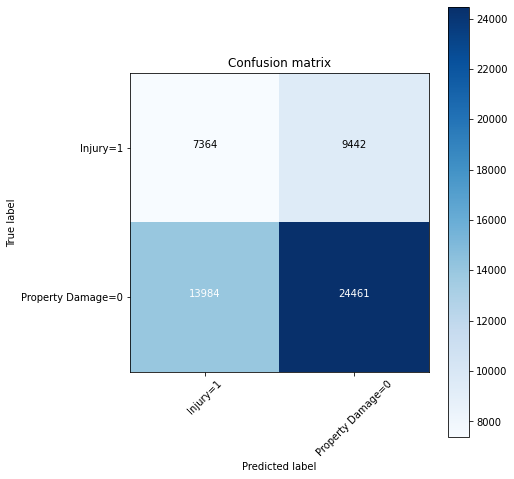

In [135]:
# Plot confusion matrix
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

In [136]:
#Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(os_data_X,os_data_y)

In [137]:
yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print(log_loss(y_test, yhat_prob))

0.6888226756788725


In [138]:
print ("Accuracy", accuracy_score(yhatLR,y_test))
print (classification_report(y_test, yhatLR))

Accuracy 0.5888219217751715
              precision    recall  f1-score   support

           0       0.72      0.67      0.69     38445
           1       0.35      0.41      0.38     16806

    accuracy                           0.59     55251
   macro avg       0.53      0.54      0.53     55251
weighted avg       0.61      0.59      0.60     55251



Confusion matrix, without normalization
[[ 6846  9960]
 [12758 25687]]


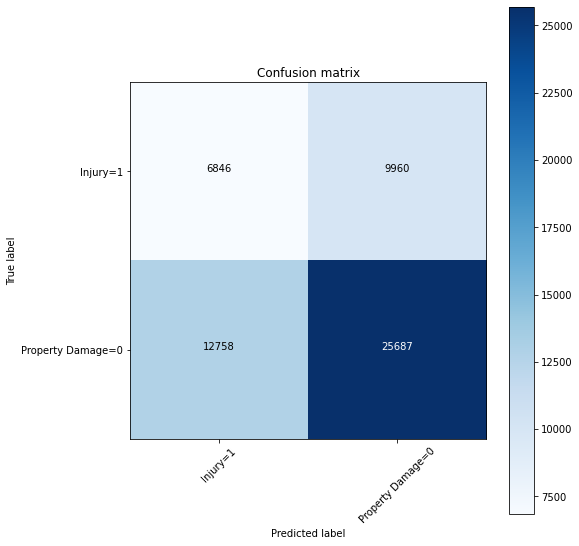

In [139]:
cnf_matrix = confusion_matrix(y_test, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)

# Plot confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')